In [105]:
#some packages and modules that I will use. 

# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import plotly
import plotly.express as px

from imblearn.over_sampling import SMOTE

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## LOADING THE DATA

In [51]:
df = pd.read_csv("/content/drive/MyDrive/HW3/uci-secom.csv")

In [52]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [53]:
df.shape

(1567, 592)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


#FILTERING THE DATA

In [54]:
missing_data=data.isna().sum()


PLOTTING THE MISSING DATA ENTRIES

In [124]:
px.histogram(missing_data,title="Missing Values")

REMOVING SPARSE FEATURES

In [57]:
df = df[df.columns[df.isna().sum() <100]]


In [79]:
df.isna().value_counts()

In [60]:
df=df.dropna()

In [64]:
df2=df['Pass/Fail'].replace(-1,0)

In [74]:
df2

1       0
2       1
3       0
4       0
5       0
       ..
1537    0
1539    0
1540    0
1541    0
1550    0
Name: Pass/Fail, Length: 1393, dtype: int64

In [75]:
df['Pass/Fail']=df2

In [88]:
df=df.drop('Time',axis=1)

# TEST-TRAIN SPLIT

In [99]:
X = df.drop(['Pass/Fail'],axis=1)
y = df['Pass/Fail']

In [101]:
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#MACHINE LEARNING

In [107]:
model = LogisticRegression(max_iter=100)

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       904
           1       0.67      0.03      0.05        71

    accuracy                           0.93       975
   macro avg       0.80      0.51      0.51       975
weighted avg       0.91      0.93      0.90       975



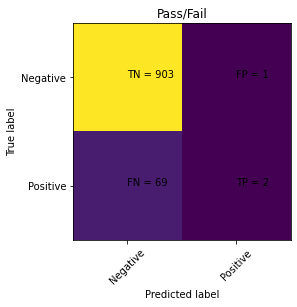

In [125]:
predict1 = model.predict(X_train)
print(classification_report(y_train, predict1))

# computes the confusion matrix
cm = confusion_matrix(y_train, predict1)

# Plots the confusion matrix

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Pass/Fail')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       390
           1       0.00      0.00      0.00        28

    accuracy                           0.93       418
   macro avg       0.47      0.50      0.48       418
weighted avg       0.87      0.93      0.90       418



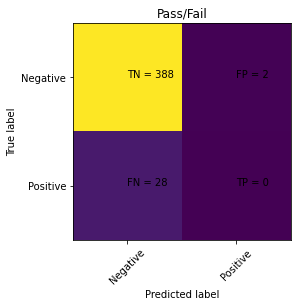

In [126]:
predict2 = model.predict(X_test)
print(classification_report(y_test, predict2))

# computes the confusion matrix
cm = confusion_matrix(y_test, predict2)

# Plots the confusion matrix

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Pass/Fail')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#NORMALIZING THE DATA

In [120]:
print("Mean:\n\n",df.mean(),"\n")
fig1 = px.histogram(df.mean(),title="Mean")
fig1.show()
print("\n\nStandard Deviation:\n\n",df.std(),'\n')
fig2 = px.histogram(df.std(),title="Standard Deviation")
fig2.show()

Mean:

 0            3014.966274
1            2494.861981
2            2200.348900
3            1384.417093
4               2.928322
                ...     
586             0.021743
587             0.016454
588             0.005279
589            98.088611
Pass/Fail       0.071070
Length: 539, dtype: float64 





Standard Deviation:

 0             74.195555
1             81.555556
2             29.825001
3            415.755060
4             42.128656
                ...    
586            0.012602
587            0.008801
588            0.002865
589           92.838412
Pass/Fail      0.257033
Length: 539, dtype: float64 

